In [135]:
<h1> Create commands for batch execution </h1>

SyntaxError: invalid syntax (<ipython-input-135-3f3de399dbcd>, line 1)

In [ ]:
import numpy as np
total=50
distances=np.linspace(0,0.75,total)
angles=np.linspace(0,0.75,total)
dist_vec=[]
ang_vec=[]
idx_vec=[]
idx=0


f= open("commands_complete.txt","w")
for dist in distances:
    for ang in angles:
        f.write("""    - name: "nig%.2f_%.2f"
      cmd: "{{ cmd_prefix }} -csf 'lambda name: int(name)<1' -nig %.2f %.2f -ss 1"
      files_to_collect:
        - '{{ dataset_path }}/atom_calibration.json'
        -  '/tmp/optimized.urdf.xacro'\n\n""" % (dist,ang,dist,ang))
        dist_vec.append(dist)
        ang_vec.append(ang)
        idx=idx+1
        idx_vec.append(idx)
        
f.close()

# ang_vec=np.deg2rad(ang_vec)

initial_vec=np.column_stack((idx_vec,np.column_stack((dist_vec,ang_vec))))
        

In [ ]:
ang_vec=np.rad2deg(ang_vec)
# dist_vec=np.multiply(dist_vec,1000)
dist_vec

<h1> Create vectors with sensors errors and execution time </h1>

In [ ]:
import numpy as np
#initialization
mylines = []
time_vec=[]
e_lidar_vec=[]
e_hand_vec=[]
e_world_vec=[]
i=0

#read file and extract errors and time
with open("outputs/output_075_075_10e_8.txt","rt") as myfile:    
    for myline in myfile:                   
        mylines.append(myline.rstrip('\n'))
                
for line in mylines:
    idx=line.find("Command executed in ")
    if idx != -1:
        i_final=line.find(" secs.")
        i=idx+len("Command executed in ")
        time=float(line[i:i_final])
        time_vec.append(time)

    idx_lidar=line.find("Sensor 3dlidar ")
    if idx_lidar != -1:
        i=idx_lidar+len("Sensor 3dlidar ")
        i_final=len(line)
        e_lidar=float(line[i:i_final])
        e_lidar_vec.append(e_lidar)
        
    idx_hand=line.find("Sensor hand_camera ")
    if idx_hand != -1:
        i=idx_hand+len("Sensor hand_camera ")
        i_final=len(line)
        e_hand=float(line[i:i_final])
        e_hand_vec.append(e_hand)
        
    idx_world=line.find("Sensor world_camera ")
    if idx_world != -1:
        i=idx_world+len("Sensor world_camera ")
        i_final=len(line)
        e_world=float(line[i:i_final])
        e_world_vec.append(e_world)

#create array
e_lidar_vec = np.delete(e_lidar_vec, 1297, 0)

e_hand_vec = np.delete(e_hand_vec, 1297, 0)

e_world_vec = np.delete(e_world_vec, 1297, 0)

vec_total=np.column_stack((np.column_stack((np.column_stack((time_vec,e_lidar_vec)),e_hand_vec)),e_world_vec))
results=np.column_stack((initial_vec,vec_total))

In [ ]:
e_lidar_vec=np.multiply(e_lidar_vec,1000)

<h1> Save results in CSV file </h1>

In [ ]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
np.around(results,4)

np.savetxt("results.csv", results, delimiter=",")

<h1>SURFACE - LIDAR ERROR</h1>

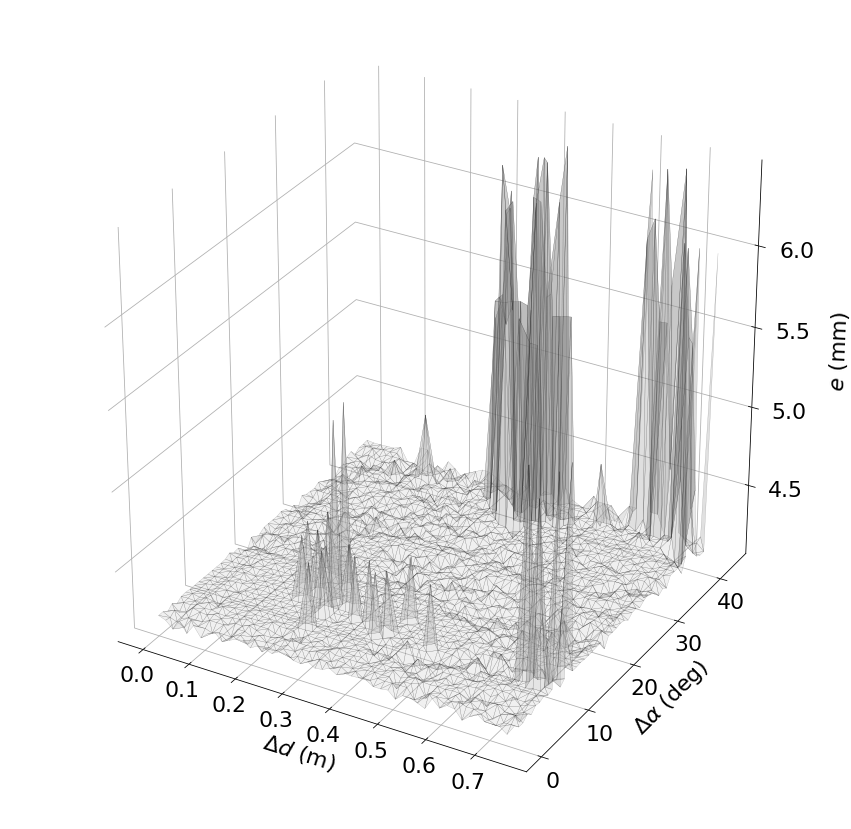

In [136]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

font1 = {'color':'black','size':28}
font2 = {'color':'black','size':22}
ls = 22
cmap = cm.colors.LinearSegmentedColormap.from_list("", ["lightgrey","gray","darkgray"])


fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('$e$ (mm)',fontdict=font2,labelpad=38)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=18)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(e_lidar_vec),cmap=cmap,
                       linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

<h1> ??? </h1>

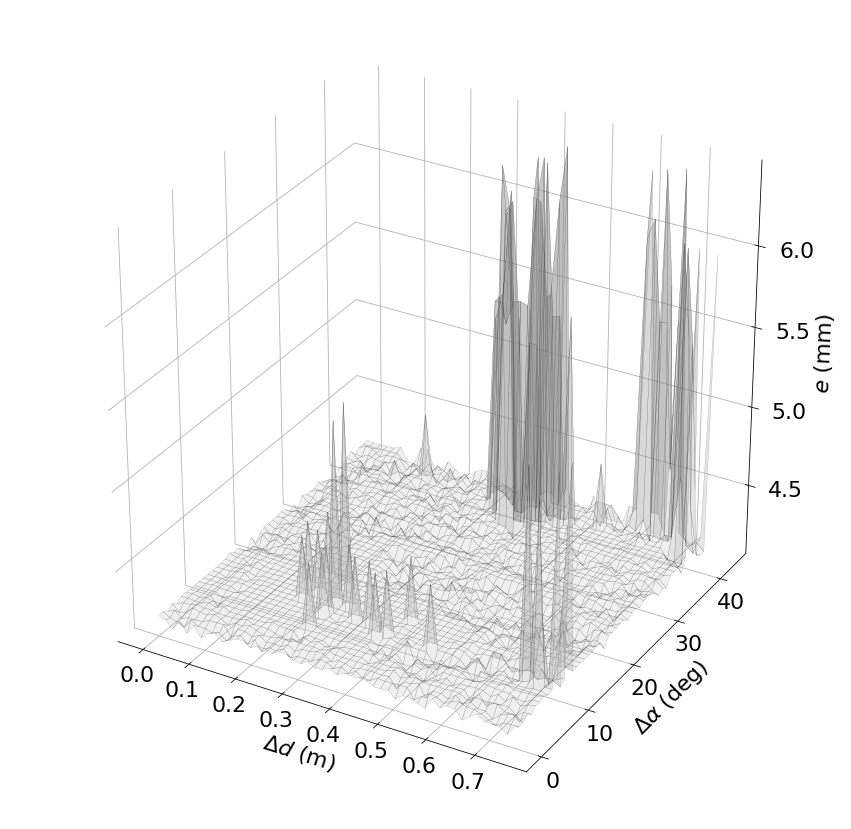

In [145]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.interpolate import griddata

fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('$e$ (mm)',fontdict=font2,labelpad=28)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=18)

x=np.array(dist_vec)
y=np.array(ang_vec)
z=np.array(e_lidar_vec)

[xGrid,yGrid] = np.meshgrid(np.linspace(min(x),max(x)),np.linspace(min(y),max(y)));
zGrid = griddata((x,y),z,(xGrid,yGrid));
zGrid = np.reshape(zGrid,xGrid.shape);

surf = ax.plot_surface(xGrid,yGrid,zGrid,cmap=cmap,
                       linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
# ax.grid(False)

# ax = fig.add_subplot(1, 2,2,aspect='equal')

# # plt.title("Lidar error vs initial estimate", fontdict=font1)
# ax.set_xlabel('Linear distance from initial estimate to ground truth (meters)',fontdict=font2)
# ax.set_ylabel(' Angular distance from initial estimate to ground truth (degrees)',fontdict=font2)
# # ax.set_zlabel('Lidar Error',fontdict=font2)

# contour=ax.contourf(xGrid,yGrid,zGrid,cmap=cmap)
# cbar=fig.colorbar(surf,ax=ax,shrink=0.7,pad=0.07)
# cbar.set_ticks([])
plt.savefig("lidar.png")

<h1> SURFACE - HAND CAMERA ERROR </h1>

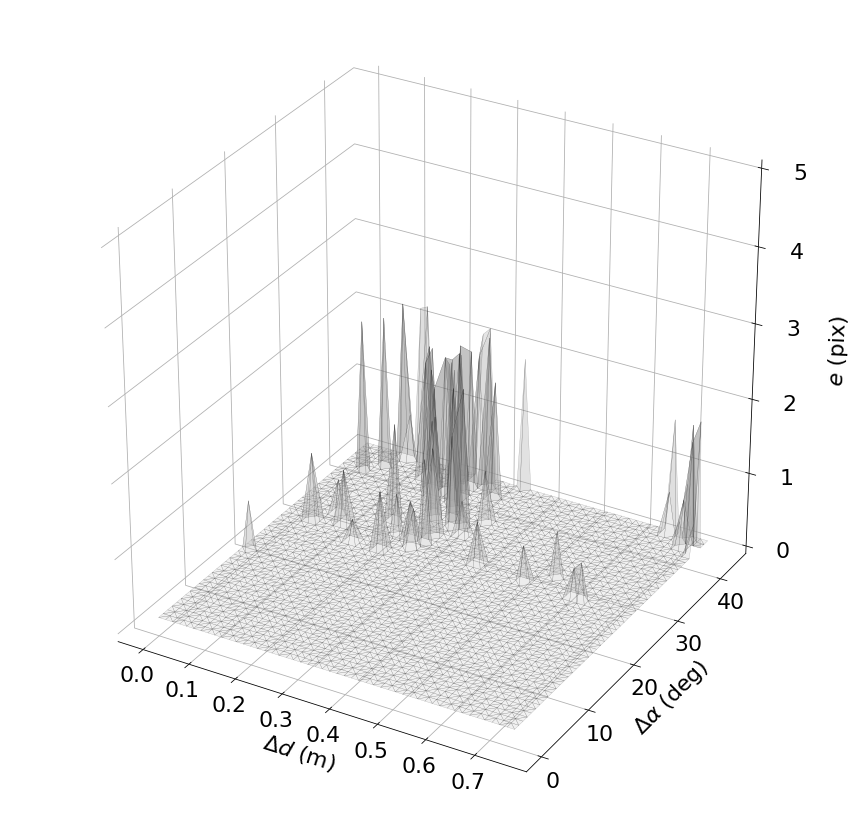

In [138]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('$e$ (pix)',fontdict=font2,labelpad=38)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=18)
ax.set_zticks([0, 1, 2,3,4,5])
ax.set_zlim3d(0, 5)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(e_hand_vec),cmap=cmap,
                       linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

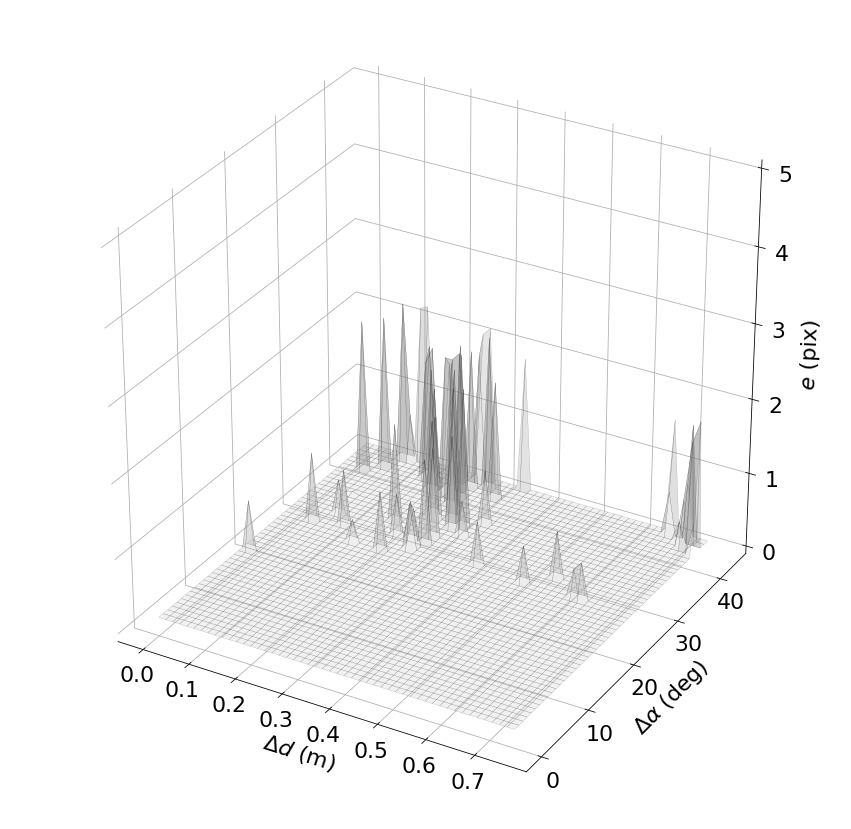

In [142]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.interpolate import griddata



fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('$e$ (pix)',fontdict=font2,labelpad=18)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=8)
ax.set_zticks([0, 1, 2,3,4,5])
ax.set_zlim3d(0, 5)

x=np.array(dist_vec)
y=np.array(ang_vec)
z=np.array(e_hand_vec)

[xGrid,yGrid] = np.meshgrid(np.linspace(min(x),max(x)),np.linspace(min(y),max(y)));
zGrid = griddata((x,y),z,(xGrid,yGrid));
zGrid = np.reshape(zGrid,xGrid.shape);

surf = ax.plot_surface(xGrid,yGrid,zGrid,cmap=cmap,
                       linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
plt.savefig("hand_camera.png")




<h1> SUFACE - WORLD CAMERA ERROR </h1>

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('$e$ (pix)',fontdict=font2,labelpad=38)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=18)
ax.set_zticks([0, 1, 2,3,4,5])
ax.set_zlim3d(0, 5)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(e_world_vec),cmap=cmap,
                       linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

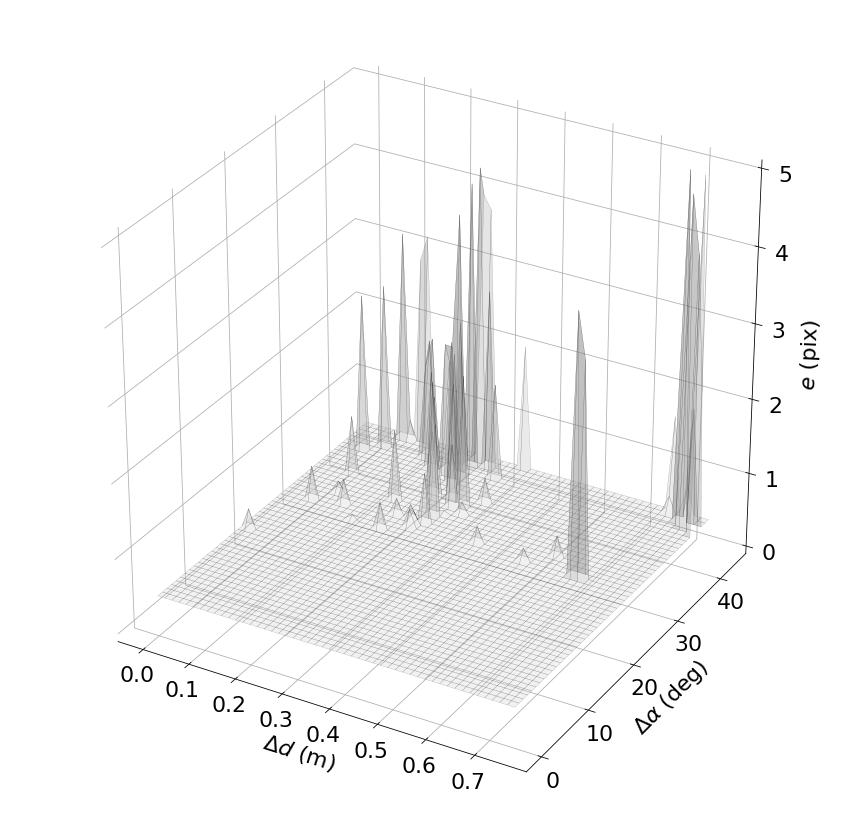

In [149]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.interpolate import griddata



fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('$e$ (pix)',fontdict=font2,labelpad=18)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=8)
ax.set_zticks([0, 1, 2,3,4,5])
ax.set_zlim3d(0, 5)

x=np.array(dist_vec)
y=np.array(ang_vec)
z=np.array(e_world_vec)

[xGrid,yGrid] = np.meshgrid(np.linspace(min(x),max(x)),np.linspace(min(y),max(y)));
zGrid = griddata((x,y),z,(xGrid,yGrid));
zGrid = np.reshape(zGrid,xGrid.shape);

surf = ax.plot_surface(xGrid,yGrid,zGrid,cmap=cmap,
                                             linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax = fig.add_subplot(1, 2,2,aspect='equal')

# # plt.title("World camera error vs initial estimate", fontdict=font1)
# ax.set_xlabel('Linear distance from initial estimate to ground truth (meters)', fontdict=font2)
# ax.set_ylabel('Angular distance from initial estimate to ground truth (degrees)', fontdict=font2)
# # # ax.set_zlabel('World Camera Error', fontdict=font2)

# # contour=ax.contourf(xGrid,yGrid,zGrid,cmap=cmap)
# cbar=fig.colorbar(surf,ax=ax,shrink=0.7,pad=0.07)
# cbar.set_ticks([])
plt.savefig("world_camera.png")



<h1>SURFACE - TIME VS INITIAL ESTIMATE</h1>

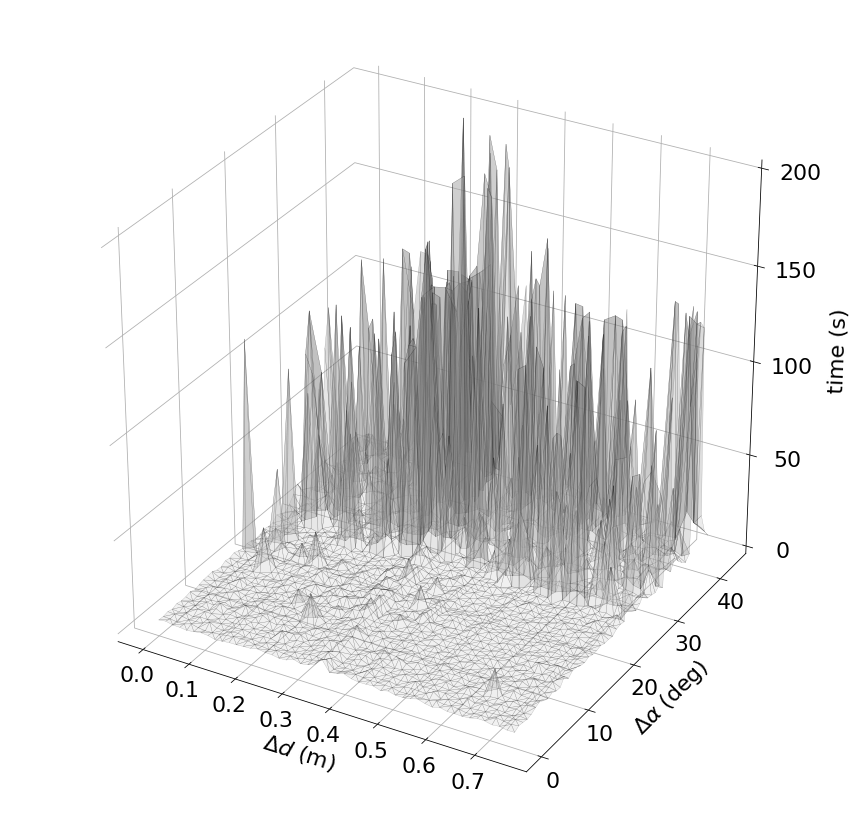

In [150]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('time (s)',fontdict=font2,labelpad=38)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=18)
ax.set_zticks([0, 50, 100,150,200])
ax.set_zlim3d(0, 200)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(time_vec),cmap=cmap,
                       linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

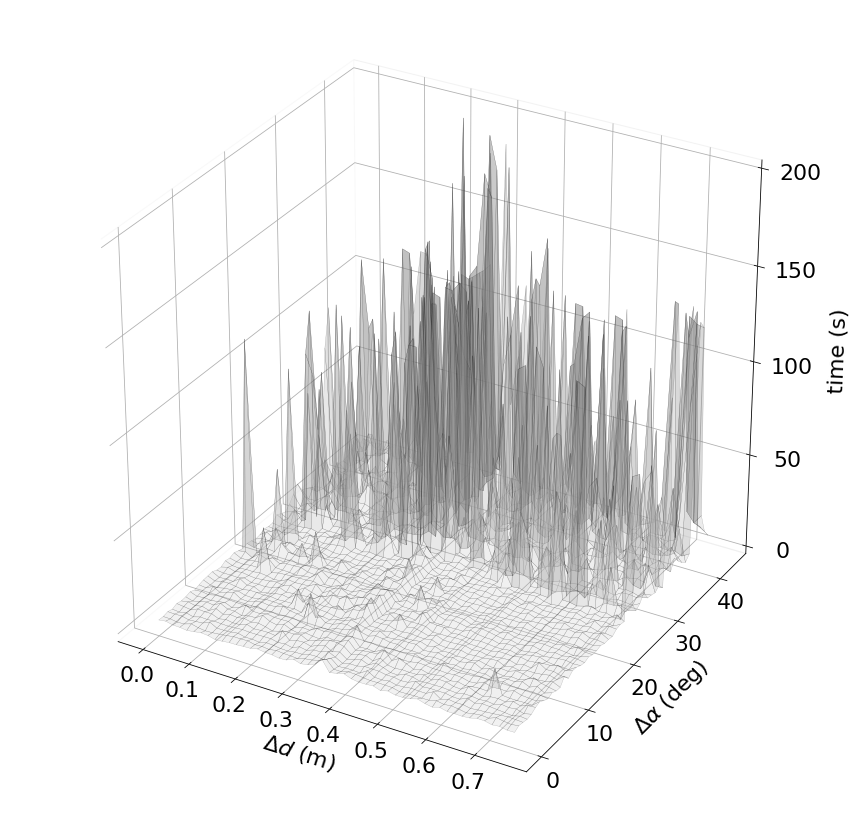

In [151]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.interpolate import griddata


fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')

ax.set_xlabel('$\Delta d$ (m)',fontdict=font2, labelpad=12)
ax.set_ylabel(r'$\Delta \alpha$ (deg)',fontdict=font2, labelpad=12)
ax.set_zlabel('time (s)',fontdict=font2,labelpad=38)
ax.xaxis.set_tick_params(labelsize=ls)
ax.yaxis.set_tick_params(labelsize=ls)
ax.zaxis.set_tick_params(labelsize=ls,pad=18)
ax.set_zticks([0, 50, 100,150,200])
ax.set_zlim3d(0, 200)

x=np.array(dist_vec)
y=np.array(ang_vec)
z=np.array(time_vec)

[xGrid,yGrid] = np.meshgrid(np.linspace(min(x),max(x)),np.linspace(min(y),max(y)));
zGrid = griddata((x,y),z,(xGrid,yGrid));
zGrid = np.reshape(zGrid,xGrid.shape);

surf = ax.plot_surface(xGrid,yGrid,zGrid,cmap=cmap,
                                              linewidth=0.3, antialiased=True, alpha = 0.3, edgecolor = 'k'                      )
ax.set_facecolor("white")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax = fig.add_subplot(1, 2,2,aspect='equal')

# # plt.title("Time vs initial estimate", fontdict=font1)
# ax.set_xlabel('Linear distance from initial estimate to ground truth (meters)', fontdict=font2)
# ax.set_ylabel('Angular distance from initial estimate to ground truth (degrees)', fontdict=font2)
# # ax.set_zlabel('Time', fontdict=font2)


# contour=ax.contourf(xGrid,yGrid,zGrid,cmap=cmap)
# cbar=fig.colorbar(surf,ax=ax,shrink=0.7,pad=0.07)
# cbar.set_ticks([])
plt.savefig("time.png")

